In [3]:
import pandas as pd
housing = pd.read_csv("data.csv")

In [4]:
housing.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     445 non-null    float64
 1   INDUS    445 non-null    float64
 2   CHAS     445 non-null    int64  
 3   NOX      445 non-null    float64
 4   RM       445 non-null    float64
 5   AGE      445 non-null    float64
 6   DIS      440 non-null    float64
 7   RAD      445 non-null    int64  
 8   TAX      445 non-null    int64  
 9   PTRATIO  445 non-null    float64
 10  B        445 non-null    float64
 11  LSTAT    445 non-null    float64
 12  MEDV     445 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 45.3 KB


In [6]:
 housing['CHAS'].value_counts()

0    417
1     28
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,440.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,3.941405,5.954652,0.062921,0.539145,6.316883,65.229663,4.032758,10.233708,410.604494,18.619326,357.572247,12.267169,22.747191
std,9.116365,2.549485,0.243095,0.105691,0.703944,28.278222,2.132969,9.064794,177.470112,2.020232,93.661467,7.067425,9.224791
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.069110,3.920000,0.000000,0.447000,5.924000,40.400000,2.281025,4.000000,277.000000,17.400000,377.070000,6.720000,17.200000
50%,0.214090,6.410000,0.000000,0.515000,6.232000,70.600000,3.571200,5.000000,307.000000,19.100000,392.230000,10.420000,21.700000
75%,4.668830,8.100000,0.000000,0.614000,6.655000,91.200000,5.404800,24.000000,666.000000,20.200000,396.900000,16.470000,26.500000
max,88.976200,9.900000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

In [9]:
##Train test spilting
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)) * test_ratio
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"rows in train set : {len(train_set)}\nrows in test set : {len(test_set)}")

rows in train set : 356
rows in test set : 89


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [12]:
start_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 87 to 343
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     89 non-null     float64
 1   INDUS    89 non-null     float64
 2   CHAS     89 non-null     int64  
 3   NOX      89 non-null     float64
 4   RM       89 non-null     float64
 5   AGE      89 non-null     float64
 6   DIS      89 non-null     float64
 7   RAD      89 non-null     int64  
 8   TAX      89 non-null     int64  
 9   PTRATIO  89 non-null     float64
 10  B        89 non-null     float64
 11  LSTAT    89 non-null     float64
 12  MEDV     89 non-null     float64
dtypes: float64(10), int64(3)
memory usage: 9.7 KB


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'RM '}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

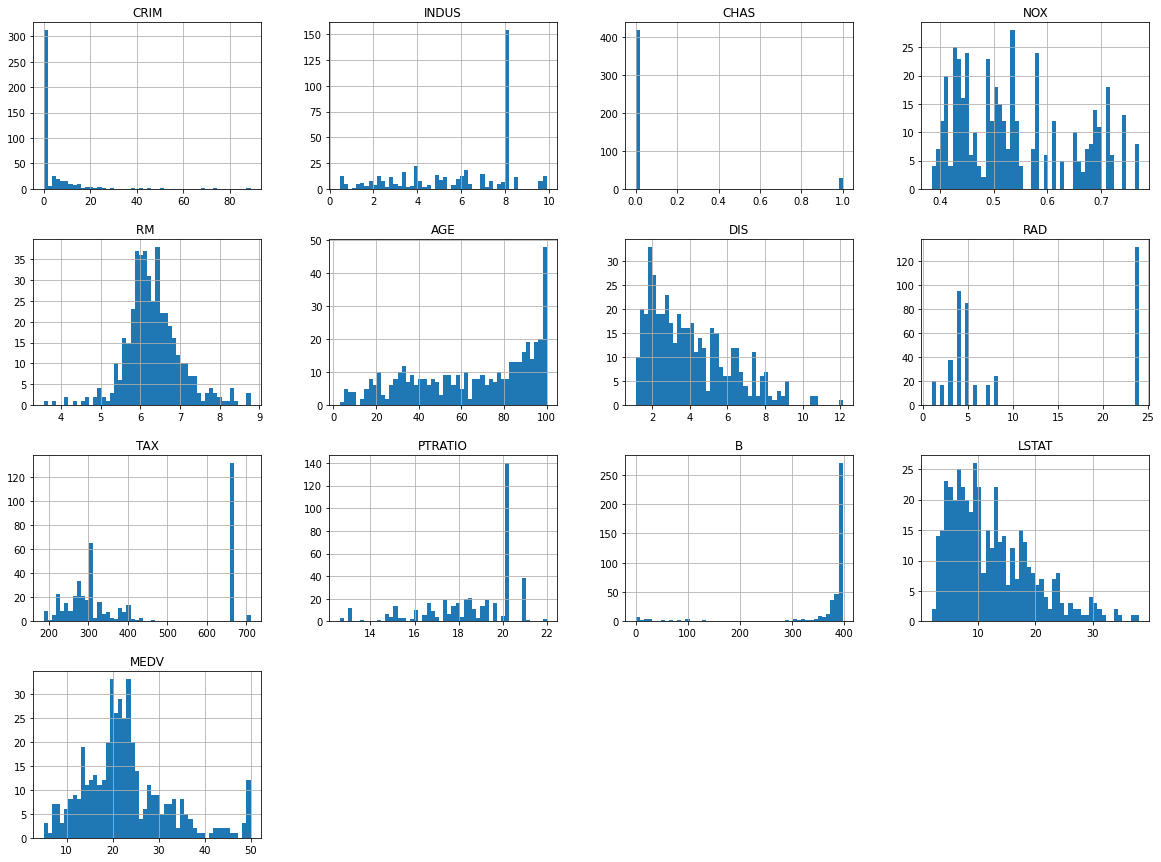

In [13]:
housing.hist(bins=50, figsize=(20,15))

KeyError: 'RM'

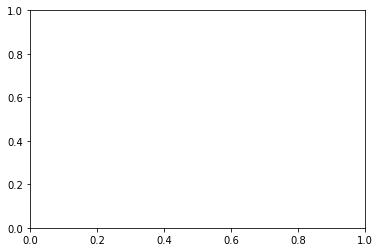

In [37]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [14]:
start_test_set['CHAS']. value_counts()

0    83
1     6
Name: CHAS, dtype: int64

In [15]:
95/7

13.571428571428571

In [16]:
import pandas as pd

In [38]:
housing = start_train_set.copy()

NameError: name 'strat_train_set' is not defined

In [17]:
median = housing["DIS"].median()

In [18]:
housing["DIS"].fillna(median)

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
440    2.4786
441    2.2875
442    2.1675
443    2.3889
444    2.5050
Name: DIS, Length: 445, dtype: float64

In [19]:
housing.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,440.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,3.941405,5.954652,0.062921,0.539145,6.316883,65.229663,4.032758,10.233708,410.604494,18.619326,357.572247,12.267169,22.747191
std,9.116365,2.549485,0.243095,0.105691,0.703944,28.278222,2.132969,9.064794,177.470112,2.020232,93.661467,7.067425,9.224791
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.069110,3.920000,0.000000,0.447000,5.924000,40.400000,2.281025,4.000000,277.000000,17.400000,377.070000,6.720000,17.200000
50%,0.214090,6.410000,0.000000,0.515000,6.232000,70.600000,3.571200,5.000000,307.000000,19.100000,392.230000,10.420000,21.700000
75%,4.668830,8.100000,0.000000,0.614000,6.655000,91.200000,5.404800,24.000000,666.000000,20.200000,396.900000,16.470000,26.500000
max,88.976200,9.900000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
housing.shape

(445, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')

In [22]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([2.1409e-01, 6.4100e+00, 0.0000e+00, 5.1500e-01, 6.2320e+00,
       7.0600e+01, 3.5712e+00, 5.0000e+00, 3.0700e+02, 1.9100e+01,
       3.9223e+02, 1.0420e+01, 2.1700e+01])

In [50]:
X = imputer.transform(housing)


NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
housing_tr = pd.DataFrame(X , columns=housing.columns)

ValueError: DataFrame constructor not properly called!

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline ({
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
})

In [42]:
housing.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,351.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,4.023166,5.969185,0.061798,0.536997,6.321045,64.812640,4.010694,10.283708,411.598315,18.611236,357.840140,12.175674,22.976404
std,9.501889,2.564509,0.241127,0.103688,0.700850,28.470767,2.094096,9.060104,177.200925,1.974910,94.506984,7.005536,9.090915
min,0.006320,0.590000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.071885,3.890000,0.000000,0.447000,5.926000,39.750000,2.339400,4.000000,279.000000,17.400000,377.547500,6.720000,17.350000
50%,0.211425,6.660000,0.000000,0.515000,6.250000,70.250000,3.554900,5.000000,311.000000,19.100000,392.315000,10.410000,21.750000
75%,4.689715,8.100000,0.000000,0.610250,6.676250,91.125000,5.400700,24.000000,666.000000,20.200000,396.250000,16.367500,27.100000
max,88.976200,9.900000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
